In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import glob
import os
import csv

import matplotlib.pyplot as plt

In [2]:
PATH = "../../results_cellmixing_numbers/"

In [3]:
#Note the S436E deep sequencing file was not used for bcfrac calculation
CSV = [
PATH+'436D_NUMBERS.csv',
PATH+'436E_NUMBERS.csv',
PATH+'436F_NUMBERS.csv'
]
print(CSV)

['../../results_cellmixing_numbers/436D_NUMBERS.csv', '../../results_cellmixing_numbers/436E_NUMBERS.csv', '../../results_cellmixing_numbers/436F_NUMBERS.csv']


In [4]:
#Read dataframes for all files and take a look
df_436 = []
for file in CSV:
    df_436.append(pd.read_csv(file, index_col=0))
df_436[0]

,436D
Human_BC1,6659
Human_BC2,47698
Mouse_BC1,135565
Mouse_BC2,17100
Human_TotalReads,54357
Mouse_TotalReads,152665
TotalReads,207022


In [5]:
#Enter in the number for eGFP reads, order is experiment D, E, F
eGFP_bc2 = np.array([296, 791, 532])
eGFP_bc1 = np.array([17, 62, 37])

In [6]:
def calcFrac(data):
    h_bc2 = data.loc["Human_BC2"] / data.loc["Human_TotalReads"]
    m_bc1 = data.loc["Mouse_BC1"] / data.loc["Mouse_TotalReads"]
    
    return h_bc2, m_bc1

In [7]:
#construct a new dataframe for plotting scatterplots of fraction of correct reads
hm_df = pd.DataFrame(columns = ["Human BC2", "Mouse BC1", "Mapped Read"], index=range(9))
hm_df.index.name = "Fraction of Reads"

In [8]:
hm_df

,Human BC2,Mouse BC1,Mapped Read
Fraction of Reads,,,
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN


In [9]:
#construct the dataframe and visualize it
for idx,df in enumerate(df_436):
    h_bc2, m_bc1 = calcFrac(df)
    hm_df.loc[idx, "Human BC2"] = h_bc2[0]
    hm_df.loc[idx, "Mouse BC1"] = 1-h_bc2[0]
    hm_df.loc[idx, "Mapped Read"] = "Human"
    
    hm_df.loc[idx+3, "Mouse BC1"] = m_bc1[0]
    hm_df.loc[idx+3, "Human BC2"] = 1-m_bc1[0]
    hm_df.loc[idx+3, "Mapped Read"] = "Mouse"
    
    hm_df.loc[idx+6, "Human BC2"] = eGFP_bc2[idx] / (eGFP_bc2[idx] + eGFP_bc1[idx])
    hm_df.loc[idx+6, "Mouse BC1"] = eGFP_bc1[idx] / (eGFP_bc2[idx] + eGFP_bc1[idx])
    hm_df.loc[idx+6, "Mapped Read"] = "eGFP"
hm_df

,Human BC2,Mouse BC1,Mapped Read
Fraction of Reads,,,
0,0.877495,0.122505,Human
1,0.877352,0.122648,Human
2,0.865438,0.134562,Human
3,0.11201,0.88799,Mouse
4,0.11496,0.88504,Mouse
5,0.101148,0.898852,Mouse
6,0.945687,0.054313,eGFP
7,0.927315,0.072685,eGFP
8,0.934974,0.065026,eGFP


In [10]:
#Save df
hm_df.to_csv("436_BCFraction.csv")

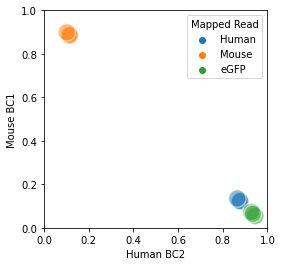

In [11]:
#Plot Figure
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=hm_df, x="Human BC2", y="Mouse BC1", hue="Mapped Read", alpha=0.5, s=300)
ax.set(ylim=(0,1))
ax.set(xlim=(0,1))
plt.savefig("436_BCFraction.pdf")

#### Plotting as a barplot 

In [12]:
#used to offset trio of barplots
x=[1.1, 1.2, 1.3, 1.5, 1.6, 1.7, 1.9, 2.0, 2.1] 

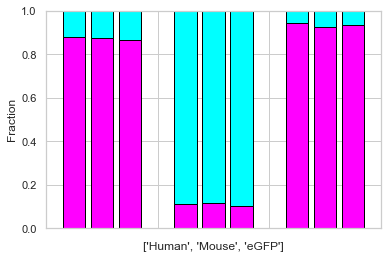

In [13]:
sns.set_theme(style="whitegrid")
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.xlabel(["Human", "Mouse", "eGFP"])
plt.ylabel("Fraction")
ax.set_xlim([1, 2.2])
ax.set_ylim([0, 1])

ax.bar(x=x, height=hm_df["Human BC2"], 
            color="magenta", edgecolor = "black", 
            width = 0.08,
           )

ax.bar(x=x, height=hm_df["Mouse BC1"], bottom=hm_df["Human BC2"], 
            width = 0.08, edgecolor = "black", 
            color="cyan",
           )

plt.savefig("barplot.pdf")